In [ ]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## References

+ https://nlp.stanford.edu/pubs/see2017get.pdf
+ https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ https://openreview.net/pdf?id=SyK00v5xx
+ https://arxiv.org/abs/1409.0473
+ 

## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答：
1. 新闻简报（对长新闻的自动提取）
2. 微信公众号文章的自动摘要
3. paper文章的自动摘要
4. 谷歌登搜索引擎搜索后看到的简短摘要

##### 提示，如果需要帮助，可以运行以下的提示

In [ ]:
# remove the # before hint(), to show the example sulution
#hint('a.641c.7d22.5f15.64ce.ff1b.a.32.2e.20.89c2.70b9.62bd.53d6.ff1b.a.33.2e.20.65b0.95fb.ff1b.a.34.2e.20.6c47.62a5.6587.6863.a')

Q2. 目前的摘要技术分为哪两类？

回答：
1. Extraction 抽取式
2. Abstraction 生成式

> 目前Extraction抽取式的主要方法：

>> - 基于统计：统计词频，位置等信息，计算句子权值，再简选取权值高的句子作为文摘，特点：简单易用，但对词句的使用大多仅停留在表面信息。

>> - 基于图模型：构建拓扑结构图，对词句进行排序。例如，TextRank/LexRank。

>> - 基于潜在语义：使用主题模型，挖掘词句隐藏信息。例如，采用LDA，HMM。

>> - 基于线路规划：将摘要问题转为线路规划，求全局最优解。

>> 在python语言中用于文本摘要自动提取的库包括goose，SnowNLP，TextTeaser，sumy，TextRank等。


In [1]:
#hint('a.6458.8981.20.41.62.73.74.72.61.63.74.69.76.65.3a.20.91cd.65b0.6574.7406.4fe1.606f.a.62bd.53d6.20.45.78.74.72.61.63.74.69.76.65.3a.20.4ece.539f.6587.4e2d.63d0.53d6.90e8.5206.a')

Q3. 目前实现自动摘要的难点在哪里？列出三点。

回答：
1. 生成字数简短、精炼，读起来通顺的摘要，如何评价摘要比较难
2. 找到权重最高的句子
3. 中文多文档摘要

In [ ]:
#hint('a.31.2e.20.7f3a.4e4f.6807.6ce8.8bad.7ec3.6570.636e.ff1b.a.32.2e.20.57fa.4e8e.6587.672c.7406.89e3.ff0c.63d0.53d6.91cd.8981.5185.5bb9.96be.ff1b.a.33.2e.20.4eba.7c7b.5bf9.6587.672c.903b.8f91.654f.611f.ff0c.6458.8981.7ed3.679c.5bb9.9519.7387.4f4e.a')

## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答： 

（简单）**Pagerank算法是Google的网页排名算法，通过网页间的互相‘投票’得到网页的重要性分数。**

（详细）PageRank 是一种通过网页之间的超链接来计算网页重要性的技术，以 Google 创办人 Larry Page 之姓来命名，Google 用它来体现网页的相关性和重要性。PageRank 通过网络浩瀚的超链接关系来确定一个页面的等级，把从 A 页面到 B 页面的链接解释为 A 页面给 B 页面投票，Google 根据 A 页面（甚至链接到 A 的页面）的等级和投票目标的等级来决定 B 的等级。简单的说，一个高等级的页面可以使其他低等级页面的等级提升。

整个互联网可以看作是一张有向图图，网页是图中的节点，网页之间的链接就是图中的边。如果网页 A 存在到网页 B 的链接，那么就有一条从网页 A 指向网页 B 的有向边。

构造完图后，使用下面的公式来计算网页 i 的重要性（PR值）：

$$ S(V_{i}) = (1 - d) + d \cdot \sum_{j \in In(V_{i})} \frac{1}{\vert {Out(V_{j})} \vert} S(V_{j}) $$

- d是阻尼系数，一般设置为 0.85。
- $In(V_{i})$是存在指向网页 i 的链接的网页集合。
- $Out(V_{j})$是网页 j中的链接指向的网页的集合。
- $\vert {Out(V_{j})} \vert$是集合中元素的个数。

PageRank 需要使用上面的公式多次迭代才能得到结果。初始时，可以设置每个网页的重要性为 1。
 

In [ ]:
#hint('a.31.2e.20.65b9.7a0b.3a.a.20.20.20.20.50.52.28.70.5f.69.29.20.3d.20.a.72.61.63.7b.31.2d.64.7d.7b.4e.7d.20.2b.20.64.20.5c.73.75.6d.5f.7b.70.5f.6a.20.5c.69.6e.20.4d.28.70.5f.69.29.7d.20.a.72.61.63.7b.50.52.20.28.70.5f.6a.29.7d.7b.4c.28.70.5f.6a.29.7d.a.32.2e.20.53c2.8003.ff1a.a.20.20.20.20.68.74.74.70.73.3a.2f.2f.77.77.77.2e.77.69.6b.69.77.61.6e.64.2e.63.6f.6d.2f.65.6e.2f.50.61.67.65.52.61.6e.6b.a')

Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：

（简单）**TextRank是PageRank算法在文本关键词提取和摘要抽取上的应用。**

（简单）**TextRank把文章中的每一个词视为图上的一个节点，在一定窗口范围内的词之间建立连接关系，通过PageRank的迭代算法得到每个词的重要性，进而排序提取前几个词作为关键词。**

（详细）TextRank 公式在 PageRank 公式的基础上，为图中的边引入了权值的概念：

$$ WS(V_{i}) = (1 - d) + d \cdot \sum_{j \in In(V_{i})} \frac{w_{ji}}{\sum_{V_{k} \in {Out(V_{j})}} w_{ji} } WS(V_{j}) $$

- $w_{ji}$就是是为图中节点 $V_{i}$到 $V_{j}$ 的边的权值 。
- d 依然为阻尼系数，代表从图中某一节点指向其他任意节点的概率，一般取值为0.85。
- $In(V_{i})$和 $Out(V_{j})$也和 PageRank 类似，分别为指向节点 V_{i}的节点集合和从节点 V_{i}出发的边指向的节点集合。

在 TextRank 构建的图中，默认节点就是句子，权值 $w_{ji}$就是两个句子 $S_{i}$和 $S_{j}$的相似程度。两个句子的相似度使用下面的公式来计算：

$$Similarity(S_{i}, S_{j}) = \frac{\vert {w_{k} \vert w_{k} \in S_{i} \&  w_{k} \in S_{j} }\vert }{log(\vert S_{i}) + log(\vert S_{j})} $$ 

分子是在两个句子中都出现的单词的数量，|Si|是句子 i 中的单词数。
使用 TextRank 算法计算图中各节点的得分时，同样需要给图中的节点指定任意的初值，通常都设为1。然后递归计算直到收敛，即图中任意一点的误差率小于给定的极限值时就可以达到收敛，一般该极限值取 0.0001。


## 使用 TextRank 提取摘要
自动摘要，就是从文章中自动抽取关键句。人类对关键句的理解通常是能够概括文章中心的句子，而机器只能模拟人类的理解，即拟定一个权重的评分标准，给每个句子打分，之后给出排名靠前的几个句子。基于 TextRank 的自动文摘属于自动摘录，通过选取文本中重要度较高的句子形成文摘。

依然使用 TextRank 公式：
$$ WS(V_{i}) = (1 - d) + d \cdot \sum_{j \in In(V_{i})} \frac{w_{ji}}{\sum_{V_{k} \in {Out(V_{j})}} w_{ji} } WS(V_{j}) $$

等式左边表示一个句子的权重（WS 是 weight_sum 的缩写），右侧的求和表示每个相邻句子对本句子的贡献程度。与提取关键字的时候不同，一般认为全部句子都是相邻的，不再通过窗口提取。

边的权值 Wij代表句子 Si 和 Sj 的相似度，既可以使用上面介绍过的基于句子间内容覆盖率的方法计算，也可以使用基于编辑距离，基于语义词典，余弦相似度，BM25 算法等等。
因为我们是要抽取关键句，因而是以句子为基本单位。使用 TextRank 提取摘要的整个过程如下：

1. 处理：将文本分割成句子 S1,S2,⋯,Sm，以句子为节点构建图
2. 计算句子相似度：对句子进行分词、取停用词等处理，以便于计算任意两个句子之间的相似度。将计算好的句子相似度作为两个句子构成的边的权值
3. 句子权重：根据公式，迭代传播权重计算各句子的得分。
4. 抽取文摘句：得到的句子得分进行倒序排序，抽取重要度最高的 N 个句子作为候选文摘句。
5. 形成文摘：根据字数或句子数要求，从候选文摘句中抽取句子组成文摘。

> 使用 TextRank 提取关键词（未整理进来），参考：https://xiaosheng.me/2017/04/08/article49/


In [ ]:
#hint('a.53c2.8003.8bba.6587.ff1a.20.68.74.74.70.73.3a.2f.2f.77.65.62.2e.65.65.63.73.2e.75.6d.69.63.68.2e.65.64.75.2f.7e.6d.69.68.61.6c.63.65.61.2f.70.61.70.65.72.73.2f.6d.69.68.61.6c.63.65.61.2e.65.6d.6e.6c.70.30.34.2e.70.64.66.a')

Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？ 

答：可以。
seq2seq的原理是将输入序列进行编码，然后再解码得到输出序列的过程。
训练编码器将输入的原文向量提取出关键的语义，作为解码器的输入；训练的答案是摘要文本的向量。原理就是将LSTM分别作为encoder和decoder来进行信息的提取与还原生成。


attention的机制是对encoder的每一个隐藏状态有一个权值的打分评判，分数越高的，说明输出的结果越依赖当前encoder的输入，而让模型达到更加‘注意’这一个输入点的结果。

参考地址：[完全图解RNN、RNN变体、Seq2Seq、Attention机制](https://zhuanlan.zhihu.com/p/28054589)

seq2seq 是一个Encoder–Decoder 结构的网络，它的输入是一个序列，输出也是一个序列， Encoder 中将一个可变长度的信号序列变为固定长度的向量表达，Decoder 将这个固定长度的向量变成可变长度的目标的信号序列。
这个结构最重要的地方在于输入序列和输出序列的长度是可变的，可以用于翻译，聊天机器人，句法分析，文本摘要等。
![想象一下翻译任务，input是一段英文，output是一段中文。](https://pic1.zhimg.com/80/v2-d90b7f4c45a9641296ce0862fe8ce0ac_hd.jpg)

> [完全图解RNN、RNN变体、Seq2Seq、Attention机制](https://zhuanlan.zhihu.com/p/28054589)

### Extractive, Abstractive 
+ Extractive是从文中找出关键信息，然后拼接进行结果输出
    + 确定重要信息
+ Abstracrtive: 依据文本的输入，生产单词（可能是新的单词）进行结果输出
    + Seq2Seq的问题
    + Transfomer

## Data Pipeline

我们首先加载数据

In [2]:
import pandas as pd
import numpy as np
import jieba
import os
import pandas as pd
from collections import Counter
import numpy as np
# from opencc import OpenCC
import jieba
import random
from gensim.models import FastText
from gensim.models.word2vec import LineSentence

def cut(string): return ' '.join(jieba.cut(string))
path_root = 'C:/AI-NLP/learn-NLP-luhuibo/data'
news_file = os.path.join(path_root, 'sqlResult_1558435.csv') 
# this file could downloaded from github group's : 
#  https://github.com/Artificial-Intelligence-for-NLP-Chinese/datasource 

In [3]:
news_file

'C:/AI-NLP/learn-NLP-luhuibo/data\\sqlResult_1558435.csv'

In [4]:
news_content = pd.read_csv(news_file, encoding='gb18030')
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


然后进行：
    1. 把content这一列全部拿出来
    2. 对content进行切词
    3. 统计单词出现的频率格式
    4. 其他的分析
`提示`：相关代码可以在Github Group的Slides里边的Lecture18，自动摘要里边看到。 https://github.com/Computing-Intelligence/jupyters_and_slides/blob/master/Lecuter-18-AutoSummarizaiton.pdf

In [5]:
# 业内习惯性将加载数据用函数def load_data()来处理
# 加载数据，并将处理的数据存到pureContent.csv中
def load_data():
    pure_file = os.path.join(path_root, 'pureContent.csv')
    if not os.path.exists(pure_file):
        news_file = os.path.join(path_root, 'sqlResult_1558435.csv')
        news_content = pd.read_csv(news_file, encoding='gb18030')
        #fillna()会将DataFrame中nan数据的数据填充为想要的数据，并返回填充后的结果。这里讲NANt填充为空
        news_content['content'] = news_content['content'].fillna('')
        pure_content = pd.DataFrame()
        pure_content['content'] = news_content['content']
        pure_content = pure_content.fillna('')
        pure_content['tokenized_content'] = pure_content['content'].apply(cut)
        pure_content.to_csv(pure_file, encoding='gb18030')
    else:
        print('File found! ')
        pure_content = pd.read_csv(pure_file, encoding='gb18030')
        pure_content = pure_content.fillna('')
    return pure_content

In [6]:
pure_content = load_data()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\壹心理\AppData\Local\Temp\jieba.cache
Loading model cost 0.748 seconds.
Prefix dict has been built succesfully.


In [7]:
# 再次确认文件是否加载进来
pure_content = load_data()

File found! 


In [8]:
pure_content.head()

,Unnamed: 0,content,tokenized_content
0,0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型...
1,1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙 835 作为 唯一 通过 Windows 10 桌面 平台 认证 的 ARM 处理...
2,2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,此前 的 一加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 规...
3,3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧...
4,4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,（ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...


# Train the word vector

In [9]:
# 加载模型函数，如果不存在则gensim自带的fastText进行训练，
# 语料是all_corpus.txt，用pure_content中处理过的内容
def load_model(pure_content):
    model_file = os.path.join(path_root, 'wordmodel_50.model')
    savedContent = os.path.join(path_root, 'all_corpus.txt')

    if not os.path.exists(model_file):
        if not os.path.exists(savedContent):
            with open(savedContent , 'w', encoding='utf-8') as f:
                f.write(' '.join(pure_content['tokenized_content'].tolist()))
        model = FastText(LineSentence(savedContent), workers=8,window=5, size=50, iter=10, min_count=1)
        model.save(model_file)
    else:
        print('model Found!')
        model = FastText.load(model_file)
    return model


In [10]:
model = load_model(pure_content)

c:\python36\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
c:\python36\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
# 检查模型是否训练好
model = load_model(pure_content)

model Found!


c:\python36\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [12]:
from functools import reduce

In [13]:
tokeners = [t for l in pure_content['tokenized_content'].tolist() for t in l.split()]

In [14]:
tokeners[:10]

['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）']

# Counts the words occurence

In [15]:
%matplotlib inline
from collections import Counter
tokener_counter = Counter(tokeners)
frequence = {w: count/len(tokeners) for w, count in tokener_counter.items()}
occurences_frequences = sorted(list(frequence.values()), reverse=True)
X = range(len(occurences_frequences))

In [16]:
import matplotlib.pyplot as plt

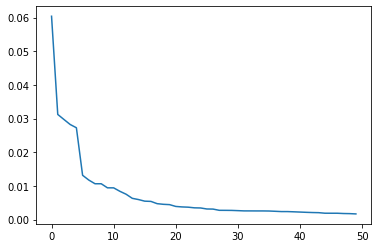

In [17]:
plt.plot(X[:50], occurences_frequences[:50])

In [18]:
tokener_counter

Counter({'此外': 4239,
         '，': 1360799,
         '自': 4829,
         '本周': 486,
         '（': 212529,
         '6': 32709,
         '月': 189525,
         '12': 10468,
         '日': 169953,
         '）': 212782,
         '起': 5266,
         '除': 1362,
         '小米': 287,
         '手机': 2997,
         '等': 58386,
         '15': 8582,
         '款': 702,
         '机型': 139,
         '外': 3291,
         '其余': 482,
         '已': 21046,
         '暂停': 834,
         '更新': 623,
         '发布': 7840,
         '含': 710,
         '开发': 3911,
         '版': 925,
         '/': 33916,
         '体验版': 1,
         '内测': 6,
         '稳定版': 1,
         '暂不受': 1,
         '影响': 8135,
         '以': 38171,
         '确保': 2854,
         '工程师': 523,
         '可以': 13287,
         '集中': 2910,
         '全部': 3790,
         '精力': 261,
         '进行': 25986,
         '系统优化': 1,
         '工作': 20722,
         '。': 636522,
         '有人': 1847,
         '猜测': 209,
         '这': 22754,
         '也': 47399,
         

## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [ ]:
#hints: 代码可以在Github Group 中看到

In [19]:
import networkx
import random

In [20]:
def genrate_name(length=3):  return ''.join(chr(random.randint(65, 73)) for _ in range(length))

In [21]:
genrate_name()

'ADD'

In [22]:
graph = {
    'Yao': ['Guo', 'Wang', 'Tian', 'Tim'] + [genrate_name() for _ in range(6)], 
    'Guo': ['Li'] + [genrate_name() for _ in range(5)], 
    'Wang': ['Li_2'] + [genrate_name() for _ in range(5)], 
    'Li': [genrate_name() for _ in range(3)], 
    'Li_2': [genrate_name() for _ in range(1)]
}

In [23]:
graph

{'Yao': ['Guo',
  'Wang',
  'Tian',
  'Tim',
  'FEA',
  'EEI',
  'BDB',
  'GCI',
  'DGF',
  'CDH'],
 'Guo': ['Li', 'GHG', 'GGA', 'DIE', 'FDC', 'EFF'],
 'Wang': ['Li_2', 'GAI', 'HGE', 'EII', 'AEB', 'CEE'],
 'Li': ['IBA', 'CDF', 'CEB'],
 'Li_2': ['HGA']}

In [24]:
social_network = networkx.graph.Graph()

In [ ]:
help(social_network.add_edges_from)

In [25]:
for vertex, edge in graph.items():
    for v in edge:
        social_network.add_edges_from([(vertex, v)])

In [26]:
# jupter notebook中需要添加这行代码才能显示图
%matplotlib inline

c:\python36\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


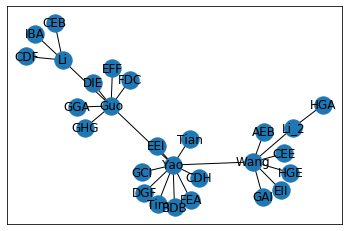

In [27]:
networkx.draw_networkx(social_network)

In [28]:
ranking_result = networkx.pagerank(social_network)

In [29]:
sorted(ranking_result.items(), key=lambda x: x[1], reverse=True)

[('Yao', 0.1747698412634544),
 ('Wang', 0.12616099221117885),
 ('Guo', 0.12434209154337311),
 ('Li', 0.07600909782512963),
 ('Li_2', 0.04007465697366682),
 ('HGA', 0.022586982681035123),
 ('IBA', 0.021706946858994478),
 ('CDF', 0.021706946858994478),
 ('CEB', 0.021706946858994478),
 ('GAI', 0.020875426652805028),
 ('HGE', 0.020875426652805028),
 ('EII', 0.020875426652805028),
 ('AEB', 0.020875426652805028),
 ('CEE', 0.020875426652805028),
 ('GHG', 0.020654738077342236),
 ('GGA', 0.020654738077342236),
 ('DIE', 0.020654738077342236),
 ('FDC', 0.020654738077342236),
 ('EFF', 0.020654738077342236),
 ('Tian', 0.020410584159305276),
 ('Tim', 0.020410584159305276),
 ('FEA', 0.020410584159305276),
 ('EEI', 0.020410584159305276),
 ('BDB', 0.020410584159305276),
 ('GCI', 0.020410584159305276),
 ('DGF', 0.020410584159305276),
 ('CDH', 0.020410584159305276)]

In [30]:
networkx.pagerank(social_network)

{'Yao': 0.1747698412634544,
 'Guo': 0.12434209154337311,
 'Wang': 0.12616099221117885,
 'Tian': 0.020410584159305276,
 'Tim': 0.020410584159305276,
 'FEA': 0.020410584159305276,
 'EEI': 0.020410584159305276,
 'BDB': 0.020410584159305276,
 'GCI': 0.020410584159305276,
 'DGF': 0.020410584159305276,
 'CDH': 0.020410584159305276,
 'Li': 0.07600909782512963,
 'GHG': 0.020654738077342236,
 'GGA': 0.020654738077342236,
 'DIE': 0.020654738077342236,
 'FDC': 0.020654738077342236,
 'EFF': 0.020654738077342236,
 'Li_2': 0.04007465697366682,
 'GAI': 0.020875426652805028,
 'HGE': 0.020875426652805028,
 'EII': 0.020875426652805028,
 'AEB': 0.020875426652805028,
 'CEE': 0.020875426652805028,
 'IBA': 0.021706946858994478,
 'CDF': 0.021706946858994478,
 'CEB': 0.021706946858994478,
 'HGA': 0.022586982681035123}

#### Task 2 使用PageRank 对文本进行关联分析

In [ ]:
#hints: 代码可以在Github Group 中看到

In [31]:
pure_content.head()

,Unnamed: 0,content,tokenized_content
0,0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型...
1,1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙 835 作为 唯一 通过 Windows 10 桌面 平台 认证 的 ARM 处理...
2,2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,此前 的 一加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 规...
3,3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧...
4,4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,（ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...


In [32]:
lengthes_of_text = map(len, pure_content['content'].tolist())

In [33]:
list(lengthes_of_text)[:20]

[177,
 329,
 216,
 45,
 1674,
 1056,
 657,
 4093,
 3665,
 755,
 169,
 1467,
 487,
 774,
 1137,
 331,
 293,
 495,
 289,
 1707]

In [34]:
networkx.__path__

['c:\\python36\\lib\\site-packages\\networkx']

In [35]:
import matplotlib.font_manager as fm
fp1 = fm.FontProperties(fname="../data/SourceHanSerifSC-Regular.otf")
# how to set chinese display: 
# https://knowlab.wordpress.com/2016/05/25/networkx-%E7%B9%AA%E5%9C%96%E9%A1%AF%E7%A4%BA%E4%B8%AD%E6%96%87%E7%9A%84%E8%A7%A3%E6%B1%BA%E6%96%B9%E6%B3%95/

def get_connect_graph_by_text_rank(tokenized_text: str, window=3):
    keywords_graph = networkx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [36]:
first_content = pure_content.iloc[1]['tokenized_content']

In [37]:
first_content_continous = pure_content.iloc[4]['content']

In [38]:
first_content_continous.replace(',', ' ').split()

['（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）',
 '@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。',
 '那么事发时',
 '到底都发生了些什么呢？',
 '南都记者带您一起还原现场',
 '南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。',
 '刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。',
 '女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。',
 '此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。',
 '现场还原',
 '从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。',
 '当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。',
 '一大清早路上看到这样的情况',
 '恐怕大家都没办法淡定',
 '面对这一情况',
 '刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。',
 '刘青一路上耐心地开导安慰她，但只听到她不

In [39]:
import re

In [40]:
pattern = re.compile('[。，,.]')
token_by_sentence_first = pattern.sub(' ', first_content_continous).split()

In [41]:
token_by_sentence_first[:10]

['（原标题：44岁女子跑深圳约会网友被拒',
 '暴雨中裸身奔走……）',
 '@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身',
 '行走在南坪快速上',
 '期间还起了轻生年头',
 '一辅警发现后赶紧为其披上黄衣',
 '并一路劝说她',
 '那么事发时',
 '到底都发生了些什么呢？',
 '南都记者带您一起还原现场']

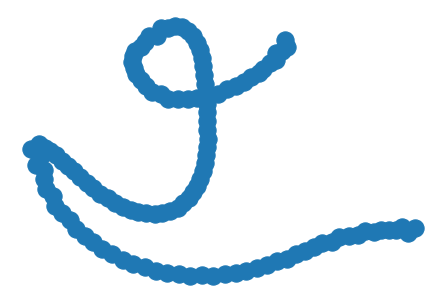

In [44]:
sentence_graph = get_connect_graph_by_text_rank(' '.join(token_by_sentence_first))
networkx.draw(sentence_graph)

In [45]:
ranking_sentence = networkx.pagerank(sentence_graph)

In [46]:
def split_sentence(sentence):
    pattern = re.compile('[。，,.]：')
    split = pattern.sub(' ', sentence).split()  # split sentence
    return split

Q6. 切句子是如何实现的？如何使用正则表达式进行句子分割？ 

回答：

In [50]:
#分割句子，将句子按照逗号和句号分隔开。
def split_sentence(sentence):
    pattern = re.compile('[(, 。\s)！？。.]')
    split = pattern.sub(' ', sentence).split()  # split sentence
    return split

In [51]:
split_sentence('我生气了,我不开心。')

['我生气了', '我不开心']

Q7. 如果对切词之后的句子的标点符号进行恢复？

回答：

In [52]:
def get_summarization_simple_with_text_rank(text, constraint=200):
    return get_summarization_simple(text, sentence_ranking_by_text_ranking, constraint)


#建立句子和标点符号之间的关系，例如，建立一个字典
def get_summarization_simple(text, score_fn, constraint=200):
    sub_sentence = split_sentence(text)
    ranking_sentence = score_fn(sub_sentence)
    selected_text = set()
    current_text = ''
    
    for sen, _ in ranking_sentence:
        if len(current_text) < constraint:
            current_text += sen
            selected_text.add(sen)
        else:
            break

    summarized = []
    for sen in sub_sentence:  # print the selected sentence by sequent
        if sen in selected_text:
            summarized.append(sen)
    return summarized


def sentence_ranking_by_text_ranking(split_sentence):
    sentence_graph = get_connect_graph_by_text_rank(' '.join(split_sentence))
    ranking_sentence = networkx.pagerank(sentence_graph)
    ranking_sentence = sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)
    return ranking_sentence


sharp_news = pure_content.iloc[8]['content']
'。 '.join(get_summarization_simple_with_text_rank(sharp_news, constraint=250))

'原来他们每天偷偷摸摸干这事。 原来他们每天偷偷摸摸干这事。 大家还记得今年4月光谷曾发生的一件大事吗。 抢购高峰期，网页打开慢，网银交易出现比较迟钝现象。 有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。 识骗方法：消费者要注意，调单、卡单、激活订单等多为诈骗术语，见此类词语基本可以断定对方是骗子。 没有收到款项这样的问题，是不会在东京、天猫这样的大型网络购物平台出现的。 抢购高峰期，网页打开慢，网银交易出现比较迟钝现象。 有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。 识骗方法：消费者要注意，调单、卡单、激活订单等多为诈骗术语，见此类词语基本可以断定对方是骗子。 没有收到款项这样的问题，是不会在东京、天猫这样的大型网络购物平台出现的。 同时，提醒大家：保护好自己账户信息，遇到情况一定及时报警。 武汉破特大网络诈骗案抓808人:以"内幕消息"骗人'

In [53]:
for index in random.sample(list(range(len(pure_content))), 30):
    content = pure_content.iloc[index]['content']
    if len(content) > 1000:
        print('{}----'.format(index))
        print(' '.join(get_summarization_simple_with_text_rank(content, constraint=250)))

1296----
江南华南强降雨持续 北方旱区多雷阵雨 这几天，暴雨成了天气关键词 其中，广东、福建、台湾等地一天下了四五百毫米的超级暴雨；江浙沪则是连绵不绝的“梅雨”；还有东北以及京津冀等地将会有冷涡雷雨 当它在低纬度以较强形式出现时，就是我们熟知的台风；而在中高纬度出现时，就是雨雪“制造机”了 历史上，从蒙古国来的低涡也曾造成多次暴雨事件 比如就北京来说，据统计，1956年-2000年蒙古低涡共出现131次，占北京暴雨过程总次数386次的34%，是北京地区出现频率较高的暴雨天气系统 不过单纯低涡并不足以形成降雨，需要水汽条件，近日京津冀等地气温持续偏高，水汽条件从南方北上，所以降雨一触即发


In [54]:
sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)

[('一名女子言语不清', 0.008761809701694283),
 ('行走在南坪快速上', 0.008761809701694281),
 ('期间还起了轻生年头', 0.00853806788025346),
 ('淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话', 0.00853806788025346),
 ('一辅警发现后赶紧为其披上黄衣', 0.008371719895408159),
 ('去年6月7号上午', 0.008371719895408159),
 ('并一路劝说她', 0.008245759268329758),
 ('女方从20岁到50岁不等', 0.008245759268329758),
 ('那么事发时', 0.00815029910456809),
 ('男子迷奸网友拍418个视频', 0.00815029910456809),
 ('@SJ-李赫海i：这个交警很暖有木有！', 0.008078401421739694),
 ('到底都发生了些什么呢？', 0.008078401421739692),
 ('南都记者带您一起还原现场', 0.008024087516959199),
 ('@Tomchlee：蜀黍帅！', 0.008024087516959199),
 ('南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警）', 0.007983207314774927),
 ('@中華云盾：警察……警察就是群众最需时申出援手', 0.007983207314774927),
 ('一位外表高大帅气', 0.007952624377193676),
 ('@火心聆听心灵：点赞交警', 0.007952624377193674),
 ('说话略带些腼腆的90后青年', 0.007929884597094566),
 ('同时也感谢交警蜀黍', 0.007929884597094566),
 ('刘青介绍', 0.007913142240506744),
 ('想想自己的家人', 0.007913142240506744),
 ('@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？', 0.007900964870248895),
 ('6月16日早上7时36分', 0.00790096487024889

In [55]:
keywords_graph = get_connect_graph_by_text_rank(first_content, window=5)

In [56]:
ranking_words = networkx.pagerank(keywords_graph)

c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39553 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\ma

c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 33021 missing from current font.
  font.load_char(ord(s), flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35265 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35265 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python36\lib\site-packages\m

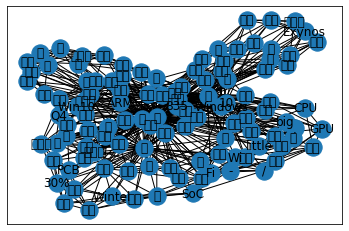

In [57]:
from matplotlib import rcParams
rcParams['font.family'] = '../data/SourceHanSerifSC-Regular.otf'
networkx.draw_networkx(keywords_graph)

In [58]:
sorted(ranking_words.items(), key=lambda x: x[1], reverse=True)[:10]

[('，', 0.04971796909107254),
 ('的', 0.032169208603727614),
 ('。', 0.02860228225909264),
 ('、', 0.02771502328849811),
 ('骁龙', 0.017759850248184172),
 ('Windows', 0.015115542829056361),
 ('10', 0.014661459543306039),
 ('835', 0.01417195081727616),
 ('桌面', 0.013938442660657342),
 ('平台', 0.012843338290542764)]

一、文本预处理的常见步骤

1.使用正则表达式去除文本多余的换行符及空格，数字及英文字母；

2.文章分句：分句的依据为文章中出现句子结束符“.!?。！？”从而实现句子之间的切分；

3.使用python的中文分词库jieba进行句子分词；

4.使用停用词表去除停用词；

5.TF_IDF特征词提取


#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

`Jupyter Notebook`里边适合做中间结果的记录以及想法验证，真正开发还是要在Pycharm等集成IDE里边进行

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:

**句子向量能够衡量句子之间的相似度，故而可以通过该方法判断某个句子是否和文本含义相关**

#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：

第一步，将句子里所有的词向量都乘以一个权重，这个权重是（a）/（a+frequency），其中a是一个常数；然后把所有的词向量相加，得到一个简单的句向量。

第二步：将所有的句向量减去他们在句向量矩阵的主成分U的投影，有点类似PCA，然后得到的就是该句子的句向量。

优点：快，无监督，性能好，运算简单

提示：频率，重要性，快速，性能好

Q10. embedding是什么？ 用数学的方式解释embedding。

回答：将数据中个体原本之间的关系能够在低维空间上表示，同时能够用数学的方法来保留这些个体之间的相互关系

提示：假设两个entity保持具有某种“偏序”特性，即，可以比较，那么，将这两个 entity 投影到另外的空间中，在该空间中，这种“偏序”依然能够保持

In [ ]:
#hint('a.63d0.793a.ff1a.5047.8bbe.4e24.4e2a.65.6e.74.69.74.79.4fdd.6301.5177.6709.67d0.79cd.201c.504f.5e8f.201d.7279.6027.ff0c.5373.ff0c.53ef.4ee5.6bd4.8f83.ff0c.90a3.4e48.ff0c.5c06.8fd9.4e24.4e2a.20.65.6e.74.69.74.79.20.6295.5f71.5230.53e6.5916.7684.7a7a.95f4.4e2d.ff0c.5728.8be5.7a7a.95f4.4e2d.ff0c.8fd9.79cd.201c.504f.5e8f.201d.4f9d.7136.80fd.591f.4fdd.6301.a')

Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：用户、商品。对于之间的关系描述性非常强，更加准确。

例如社交网络里边人员的embedding（进行好友推荐）， 购物网站商品的embedding（进行商品推荐）
另外，可以思考一下基于这种embedding的推荐的优点在哪里？ 

In [ ]:
#hint('a.4f8b.5982.793e.4ea4.7f51.7edc.91cc.8fb9.4eba.5458.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.597d.53cb.63a8.8350.ff09.ff0c.20.8d2d.7269.7f51.7ad9.5546.54c1.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.5546.54c1.63a8.8350.ff09.a.53e6.5916.ff0c.53ef.4ee5.601d.8003.4e00.4e0b.57fa.4e8e.8fd9.79cd.65.6d.62.65.64.64.69.6e.67.7684.63a8.8350.7684.4f18.70b9.5728.54ea.91cc.ff1f.20.a')

Q12. 这种embedding的方法和tfidf有何异同？ 

回答：tf-idf通过计算某个单字在一段文字中出现的频率，与在全部文档中出现的频率，来计算这个词出现的频率，通常用来表示这个词对于一段文字的重要程度； embedding方法是计算这个词上下文中的词出现的概率，通过这个矩阵来表示这个词的语义。

In [ ]:
hint('a.63d0.793a.ff1a.74.66.69.64.66.8003.8651.7684.9891.7387.5176.20.74.66.20.548c.20.69.64.66.20.5206.522b.662f.4ec0.4e48.ff1f.20.8be5.65.6d.62.65.64.64.69.6e.67.7684.9891.7387.7c7b.4f3c.4e8e.4ec0.4e48.ff1f.20.a')

Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答:省略、随机值、古德-图灵法

In [ ]:
#hint('a.5f00.53d1.578b.95ee.9898.ff0c.53ef.4ee5.7701.7565.ff0c.53ef.4ee5.8d4b.4e88.968f.673a.503c.ff0c.53ef.4ee5.7ed9.4e00.7279.5b9a.503c.ff0c.5177.4f53.60c5.51b5.9700.8981.7ecf.8fc7.8bd5.9a8c.8fdb.884c.5206.6790.a')

Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：计算两个矩阵的余弦距离(cosine，余弦距离)

In [ ]:
#hint('a.63.6f.73.69.6e.65.ff0c.20.4f59.5f26.8ddd.79bb.a')

Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

回答：


In [61]:
def cosine_similarity(vec1, vec2):
    '''
    计算两个向量之间的余弦相似度
    :param vec1:
    :param vec2:
    :return:
    '''
    tx = np.array(vec1)
    ty = np.array(vec2)
    cos1 = np.sum(tx * ty)
    cos21 = np.sqrt(sum(tx ** 2))
    cos22 = np.sqrt(sum(ty ** 2))
    cosine_value = cos1 / float(cos21 * cos22)
    return cosine_value


In [ ]:
#hint('a.63d0.793a.ff1a.8bf7.53c2.8003.77.6f.72.64.32.76.65.63.8bad.7ec3.65f6.5019.7684.7684.6982.7387.5206.5e03.7684.5b9a.4e49.ff0c.53ef.4ee5.770b.5230.5176.6c.6f.73.73.5f53.65f6.4f18.5316.7684.5c31.662f.20.65.78.70.28.76.31.20.2e.20.76.32.29.2c.20.90a3.4e48.5f53.20.76.31.20.2e.20.76.32.6700.5927.7684.65f6.5019.ff0c.a.5c31.662f.8fd9.4e24.4e2a.5411.91cf.65b9.5411.4e00.81f4.7684.65f6.5019.ff0c.6240.4ee5.ff0c.8be5.8bcd.5411.91cf.5728.8bad.7ec3.7684.65f6.5019.7684.6c.6f.73.73.7684.8861.91cf.ff0c.5c31.662f.4f9d.636e.65b9.5411.8fdb.884c.7684.3002.20.a')

In [ ]:
#hint('a.53e6.5916.ff0c.4e5f.4e0d.662f.4e0d.80fd.7528.6b27.51e0.91cc.5f97.ff0c.4f46.662f.4f9d.636e.4e0a.4e00.63d0.793a.4e4b.5206.6790.ff0c.6b27.51e0.91cc.5f97.662f.4e0d.80fd.5f88.597d.4fdd.6301.8bed.4e49.76f8.4f3c.6027.7684.3002.20.a')

Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：cosine只考虑“方向“是否一样

In [ ]:
#hint('63.6f.73.69.6e.65.53ea.8003.8651.201c.65b9.5411.201c.662f.5426.4e00.6837')

In [62]:
#先将所有的词向量都乘以一个常数alpha，然后将它们相加，之后再通过PCA提取他们的句向量

def sentence_embedding(sentence, cut=cut):
    # weight = alpah/(alpah + p) 
    # alpha is a parameter, 1e-3 ~ 1e-5
    alpha = 1e-4
    
    global frequence
    
    max_fre = max(frequence.values())
    
    words = cut(sentence).split()
    
    sentence_vec = np.zeros_like(model.wv['测试'])
    
    words = [w for w in words if w in model]
    
    for w in words:
        weight = alpha / (alpha + frequence.get(w, max_fre))
        sentence_vec += weight * model.wv[w]
    
    sentence_vec /= len(words)
    # Skip the PCA
    return sentence_vec

In [63]:
from scipy.spatial.distance import cosine
from functools import partial
def get_corrlations(text, cut_fn):
    if isinstance(text, list): text = ' '.join(text)
        
    sub_sentences = split_sentence(text)
    sentence_vector = sentence_embedding(text, cut_fn)
        
    correlations = {}
    
    for sub_sentence in sub_sentences:
        sub_sen_vec = sentence_embedding(sub_sentence, cut_fn)
        correlation = cosine(sentence_vector, sub_sen_vec)
        correlations[sub_sentence]= correlation

    return sorted(correlations.items(), key=lambda x: x[1], reverse=True)

In [64]:
corrlations_with_global_cut = partial(get_corrlations, cut_fn=cut)

In [65]:
def get_summarization_simple_by_sen_embedding(text, constraint=200):
    return get_summarization_simple(text, corrlations_with_global_cut, constraint)

In [127]:
corrlations = get_corrlations(sharp_news, cut)

c:\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()


In [128]:
sharp_news

'虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n'

In [129]:
corrlations

[('28', 1.016034135594964),
 ('5', 1.0141534013673663),
 ('Kryo', 0.9813904333859682),
 ('14', 0.9812515676021576),
 ('X12', 0.944944329559803),
 ('3', 0.9362230375409126),
 ('Adreno', 0.9205908104777336),
 ('R11', 0.8780125975608826),
 ('GeekBench', 0.8449447751045227),
 ('512', 0.8348383456468582),
 ('和', 0.8271111249923706),
 ('260', 0.755718469619751),
 ('2013', 0.7396700978279114),
 ('的跑分库上', 0.7396254241466522),
 ('在', 0.7283863425254822),
 ('FS8016', 0.722855269908905),
 ('302SH', 0.7159470021724701),
 ('新品了', 0.6967576444149017),
 ('”', 0.6781797707080841),
 ('660', 0.6705841720104218),
 ('调制解调器', 0.6603162884712219),
 ('820', 0.656488835811615),
 ('EDGEST', 0.644380509853363),
 ('月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12', 0.6281294524669647),
 ('不过，由于', 0.5738721489906311),
 ('又会是怎么样的手机呢', 0.5254146158695221),
 ('LTE', 0.4806997776031494),
 ('与高通签署了排他性协议，可以独占两三个月时间', 0.46851474046707153),
 ('个月之后，在座的各位手机都会换掉', 0.4561747908592224),
 ('4GB', 0.4518991708755493),
 ('纳米工艺，八个', 0.444149017333984

In [130]:
# 将列表元组转换为字典形式
# corrlations = dict(corrlations)

In [131]:
sharp_news = pure_content.iloc[6]['content']
'。 '.join(get_summarization_simple_by_sen_embedding(sharp_news, constraint=200))

c:\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()


'2013。 年退出中国市场，但是今年。 3。 又会是怎么样的手机呢。 FS8016。 的夏普神秘新机悄然出现在。 GeekBench。 的跑分库上。 660。 4GB。 660。 14。 纳米工艺，八个。 Kryo。 260。 核心设计，集成。 Adreno。 512。 GPU。 和。 X12。 LTE。 调制解调器。 660。 R11。 660。 820。 不过，由于。 与高通签署了排他性协议，可以独占两三个月时间。 660。 新品了。 2013。 EDGEST。 302SH。 28。 在。 5。 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12。 个月之后，在座的各位手机都会换掉。 ”'

In [134]:
corrlations = get_corrlations(sharp_news, cut)

c:\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()


In [143]:
corrlations_with_global_cut = partial(get_corrlations, cut_fn=cut)

In [144]:
def split_sentence(sentence):
    pattern = re.compile('[。，,.]：')
    split = pattern.sub(' ', sentence).split()  # split sentence
    return split

In [145]:
def get_sequent_correlation(text):
    sub_sentence = split_sentence(text)
    corrleations = corrlations_with_global_cut(sub_sentence)
    correlation_with_sequent = [(sen, corrlations[sen]) for sen in sub_sentence]
    return correlation_with_sequent

In [146]:
sub_sentence = get_sequent_correlation(sharp_news)
sub_sentence

c:\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()


AttributeError: 'list' object has no attribute 'items'

#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：

In [ ]:
#hint('a.63d0.793a.ff1a.53ef.4ee5.4ece.5176.5206.5e03.7684.5bc6.5ea6.ff0c.5206.5e03.53d8.5316.7b49.8d8b.52bf.8fdb.884c.89c2.5bdf.3002.a')

## More Added Feature

### KNN思想

> 对于一个sub_sentence来说，它的重要性，取决于他本身的重要性和周围的句子(neighbors)的重要性的综合；

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

我们会发现，句子的评分分布是这样起伏很大的尖锐曲线，这样抽取的句子会断断续续，显得很突兀，因此我们需要根据句子自身的重要性和周围句子的重要性，结合KNN算法使得结果更加平滑。

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [ ]:
#hint('a.23.4e00.4e2a.53ef.4ee5.7684.73.6f.6c.75.74.69.6f.6e.662f.ff1a.a.a.4c.20.3d.20.5b.31.2c.20.32.2c.20.33.2c.20.34.2c.20.31.30.2c.20.31.2c.20.32.5d.a.77.69.6e.64.6f.77.20.3d.20.33.a.a.4c.20.3d.20.5b.6e.70.2e.6d.65.61.6e.28.4c.5b.69.2d.77.69.6e.64.6f.77.3a.69.2b.77.69.6e.64.6f.77.5d.29.20.66.6f.72.20.69.20.69.6e.20.72.61.6e.67.65.28.6c.65.6e.28.4c.29.29.5d.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.6e.70.2e.6d.65.61.6e.662f.4e00.79cd.6700.7b80.5355.7684.5e73.5747.5316.65b9.6cd5.ff0c.6211.4eec.8fd8.53ef.4ee5.8003.8651.5176.4ed6.7684.4f8b.5982.8ddd.79bb.52a0.6743.ff0c.7b49.65b9.6cd5.a')

### Title 标题

> 如果一个文章有标题，那么，其实这个标题已经包含了很多它的摘要信息， 在考虑语义建模的时候，就应该对标题更加重要的考虑；

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

回答：

如果你文本存在标题，那么标题已经包含了其中的重要信息，摘要时应当把标题考虑进去。


In [ ]:
#hint('a.74.69.74.6c.65.20.3d.20.27.73.6f.6d.65.20.77.6f.72.64.73.27.a.63.6f.6e.74.65.6e.74.20.3d.20.27.6d.6f.72.65.20.61.6e.64.20.6d.6f.72.65.20.77.6f.72.64.73.27.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.74.69.74.6c.65.29.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.63.6f.6e.74.65.6e.74.29.a.23.5bf9.4e8e.4e00.4e2a.5b50.53e5.20.73.75.62.5f.73.65.6e.5f.6e.2c.20.4ee5.524d.7684.73.69.6d.69.6c.61.72.69.74.79.662f.20.63.6f.73.69.6e.65.28.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.73b0.5728.53ef.4ee5.662f.a.70.20.3d.20.30.2e.35.a.73.65.6e.5f.76.65.63.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.a.73.69.6d.69.6c.61.72.69.74.79.20.3d.20.70.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.29.20.2b.20.28.31.20.2d.20.70.29.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.70.4ee5.53ca.70.548c.63.6f.73.69.6e.65.7684.6784.5efa.90fd.662f.53ef.4ee5.53d8.5316.7684.3002.20.70.20.548c.20.31.2d.70.662f.7ebf.6027.5173.7cfb.ff0c.53ef.4ee5.662f.5176.4ed6.7684.5173.7cfb.3002.81ea.5df1.5b9a.5373.53ef.a')

### Keywords 关键字

> 关键字是很重要的，如果我们能够比较准确的提取出来关键词/字，然后对关键字/词包含的句子增加其权重；

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

#### Task 请代码实现

在文本中，存在关键词的句子往往包含了比较重要的信息，当一个句子包含比关键词时，应适当增加此句子的评分。


### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

> 对于一些文本，文章，例如一个故事的这种文章，那么他的textRank， sentence embedding 会发现，并不会出现很明显有些句子是重要的，有些句子不重要的，如果plot他的曲线的话，我们这个时候就要考虑他的位置，开头，结尾，增加一些权重；

#### Task 加入位置信息的考量

在阅读理解时，开头、结尾、段首和段尾等几乎都起着总领全文、总结或承上启下的作用，在摘要时，必须也要把句子的位置考虑进去。


### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

【参考地址】https://blog.csdn.net/Yellow_python/article/details/83097994
![gensim_LDA流程](https://img-blog.csdn.net/20181021090249778?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1llbGxvd19weXRob24=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)


> LDA主题模型，得到的主题分布，我们可以用每句话和的出来的这些主题进行相似度对比，我们不仅仅是是考虑他的整个的text， 我们还有考虑主题；

根据LDA总结出来的话题，我们可以用分句与其对比，把话题也考虑到摘要中。


#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

2. 为什么这个课题不用Seq2Seq?

3. 深度学习、机器学习与NLP之间的关系是什么？ 

4. 你还有什么其他的思考和心得？ 

## 最后一步： 使用Flask、Bottle、Bootstrap变成一个网络应用并且部署在服务器上，这样别人就可以直接通过网址访问你的应用啦。